Description Of the features of the dataset:


Y – Latitude coordinate of the observation station.

X – Longitude coordinate of the observation station.

data_payload_id – Unique identifier for the data record.

instance_datetime – Timestamp when the data was recorded.

url – URL reference to the data source.

agency – Organization responsible for the data.

platform_type – Type of platform (e.g., station, balloon, etc.).

platform_id – Numeric ID for the platform.

platform_name – Name of the observation platform or station.

gaw_id – Global Atmosphere Watch ID of the platform.

instrument_name – Name of the instrument used for measurement.

instrument_model – Model of the instrument.

instrument_number – Instrument's identification number.

monthly_date – Date associated with monthly aggregated data.

monthly_columno3 – Monthly average ozone column value.

monthly_stddevo3 – Standard deviation of the monthly ozone values.

monthly_npts – Number of observations used in monthly average.

daily_date – Date of the daily observation.

daily_wlcode – Wavelength code used during observation.

daily_obscode – Observation code (e.g., method or technique).

daily_columno3 – Daily ozone column measurement (Dobson Units).

daily_stddevo3 – Standard deviation of the daily ozone value.

daily_utc_begin – UTC time when observation began.

daily_utc_end – UTC time when observation ended.

daily_utc_mean – Mean UTC time of observation.

daily_nobs – Number of observations for that day.

daily_mmu – Measurement uncertainty for daily ozone.

daily_columnso2 – Daily SO₂ (sulfur dioxide) column measurement.

latest_observation – Flag indicating if this is the most recent data (0 or 1).

country – Country of the observation station.

scientific_authority – Name of the responsible scientist or authority.

version – Version number of the data record.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df=pd.read_csv('New Dataset/result.csv')
df.head()


,Y,X,data_payload_id,instance_datetime,url,agency,platform_type,platform_id,platform_name,gaw_id,...,daily_utc_begin,daily_utc_end,daily_utc_mean,daily_nobs,daily_mmu,daily_columnso2,latest_observation,country,scientific_authority,version
0,43.781,-79.468,2260781,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,15.3,19.2,17.0,14.0,2.7,-3.5,0,CAN,Vitali Fioletov,4.15
1,43.781,-79.468,2260785,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,16.1,19.5,17.4,12.0,2.7,-3.0,0,CAN,Vitali Fioletov,4.15
2,43.781,-79.468,2260788,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,15.6,19.3,17.4,22.0,2.7,-6.7,0,CAN,Vitali Fioletov,4.15
3,43.781,-79.468,2260764,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,14.9,18.3,16.3,7.0,2.9,-0.9,0,CAN,Vitali Fioletov,4.15
4,43.781,-79.468,2260775,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,15.0,18.9,17.7,15.0,2.7,-3.3,0,CAN,Vitali Fioletov,4.15


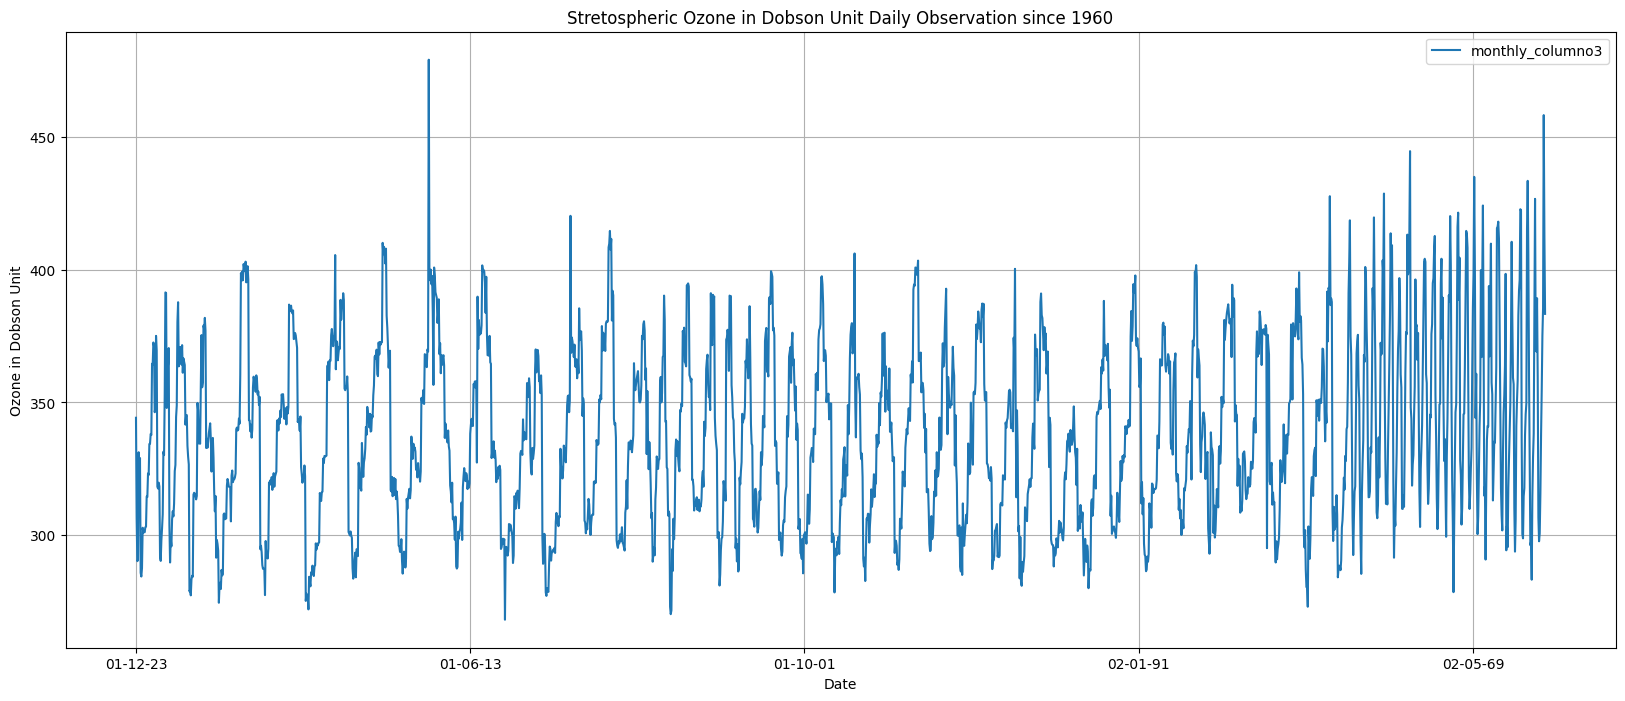

In [3]:
df_montly=df.copy()
df_montly=df_montly.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
        'monthly_stddevo3', 'monthly_npts','daily_date','daily_columno3',
        'daily_wlcode', 'daily_obscode', 
       'daily_stddevo3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)
df_montly.head()
df_montly = df_montly.drop_duplicates()
df_montly = df_montly.set_index('monthly_date')

df_montly.plot(figsize=(20,8))
plt.title("Stretospheric Ozone in Dobson Unit Daily Observation since 1960")
plt.xlabel("Date")
plt.ylabel('Ozone in Dobson Unit')
plt.grid()


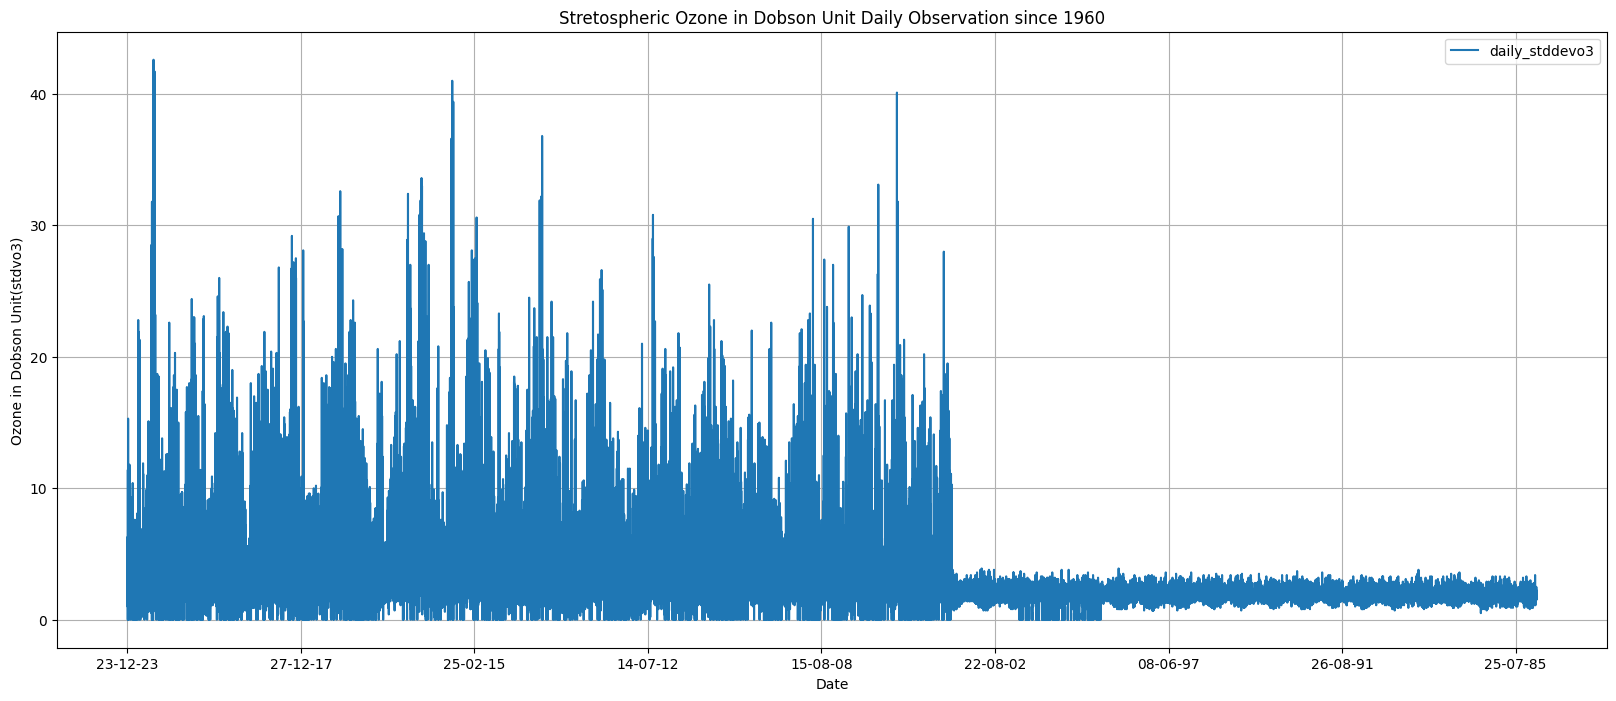

In [4]:
df_stdvo3 = df.copy()
df_stdvo3 = df_stdvo3.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
       'monthly_date', 'monthly_stddevo3', 'monthly_npts',
        'daily_wlcode', 'daily_obscode', 'monthly_columno3',
       'daily_columno3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)
df_stdvo3 = df_stdvo3.drop_duplicates()
df_stdvo3 = df_stdvo3.dropna()
df_stdvo3 = df_stdvo3.set_index('daily_date')

df_stdvo3.plot(figsize=(20,8))
plt.title("Stretospheric Ozone in Dobson Unit Daily Observation since 1960")
plt.xlabel("Date")
plt.ylabel('Ozone in Dobson Unit(stdvo3)')
plt.grid()
plt.show()

In [34]:
df=df.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
       'monthly_date', 'monthly_stddevo3', 'monthly_npts','daily_stddevo3',
        'daily_wlcode', 'daily_obscode', 'monthly_columno3',
        'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)
df.head()

,daily_date,daily_columno3
0,23-12-23,371.0
1,27-12-23,365.7
2,30-12-23,391.7
3,06-12-23,379.8
4,17-12-23,336.0


In [35]:
print(f"Date Range: {df.loc[:,'daily_date'][len(df)-1]} to {df.loc[:,'daily_date'][0]}")

Date Range: 08-01-60 to 23-12-23


In [36]:
df=df.drop_duplicates()
df=df.dropna()
# df=df.set_index('daily_date')
df.head()


,daily_date,daily_columno3
0,23-12-23,371.0
1,27-12-23,365.7
2,30-12-23,391.7
3,06-12-23,379.8
4,17-12-23,336.0


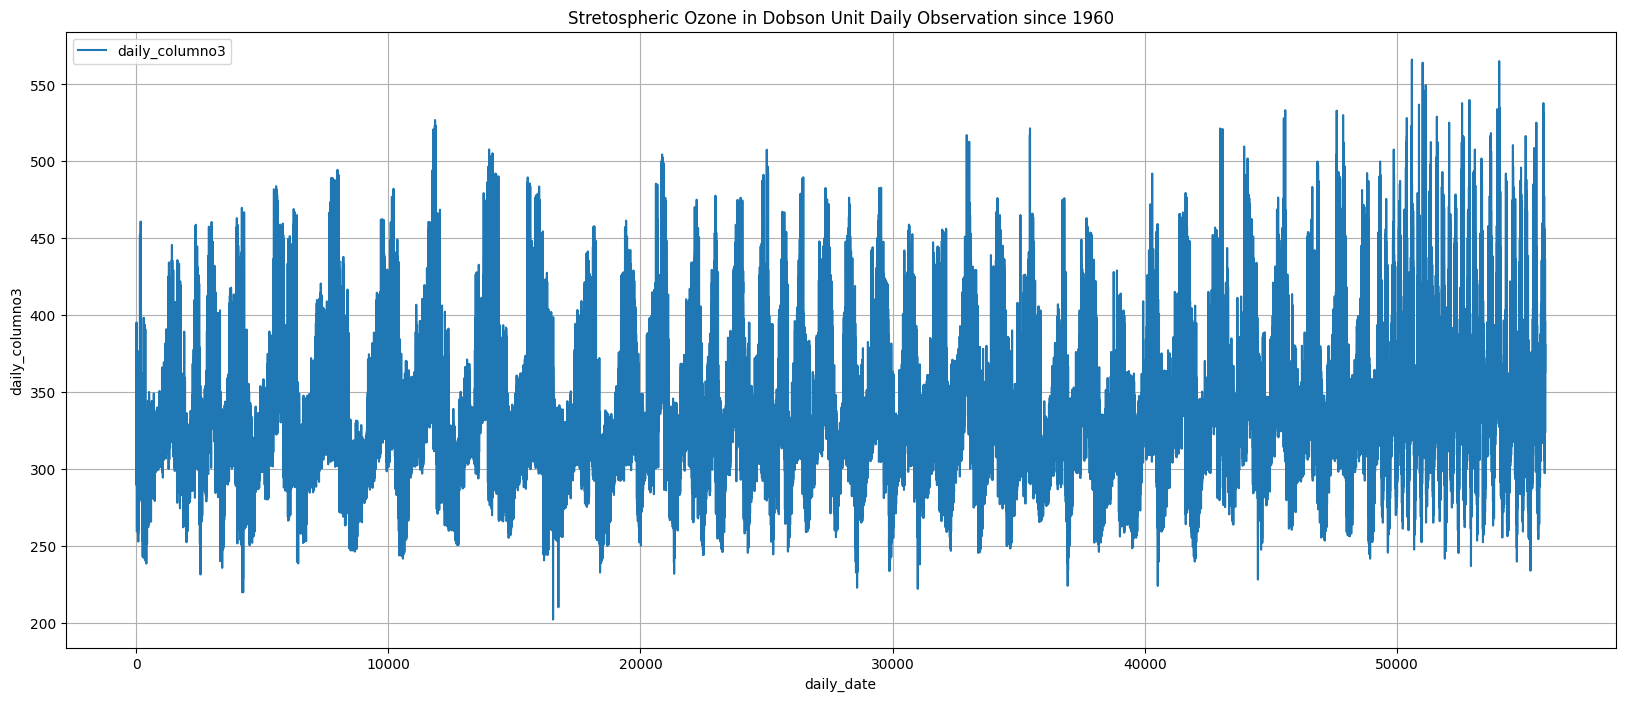

In [8]:
df.plot(figsize=(20,8))
plt.title("Stretospheric Ozone in Dobson Unit Daily Observation since 1960")
plt.xlabel("daily_date")
plt.ylabel('daily_columno3')
plt.grid()


In [9]:
round(df.describe(), 3)

,daily_columno3
count,54063.000
mean,337.449
std,44.110
min,202.000
25%,306.000
50%,330.700
75%,363.400
max,566.100


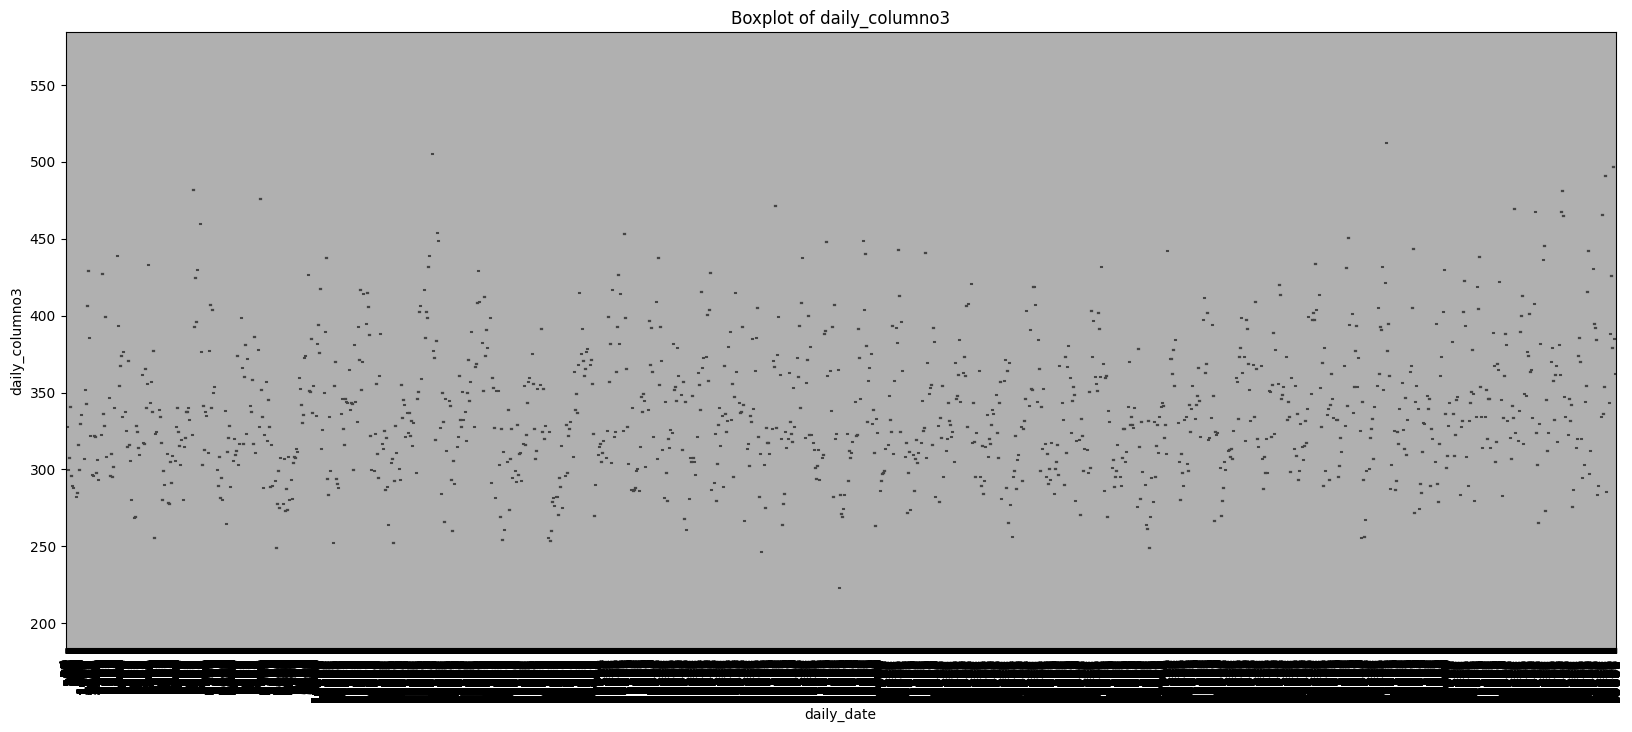

In [10]:
_,ax=plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index,y='daily_columno3',data=df,ax=ax)
ax.set_title("Boxplot of daily_columno3")
plt.xlabel("daily_date")
plt.ylabel('daily_columno3')
plt.xticks(rotation=90)
plt.grid()

In [26]:
df.head()
df.dtypes

daily_columno3    float64
dtype: object

c:\Users\Abir Hossain\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


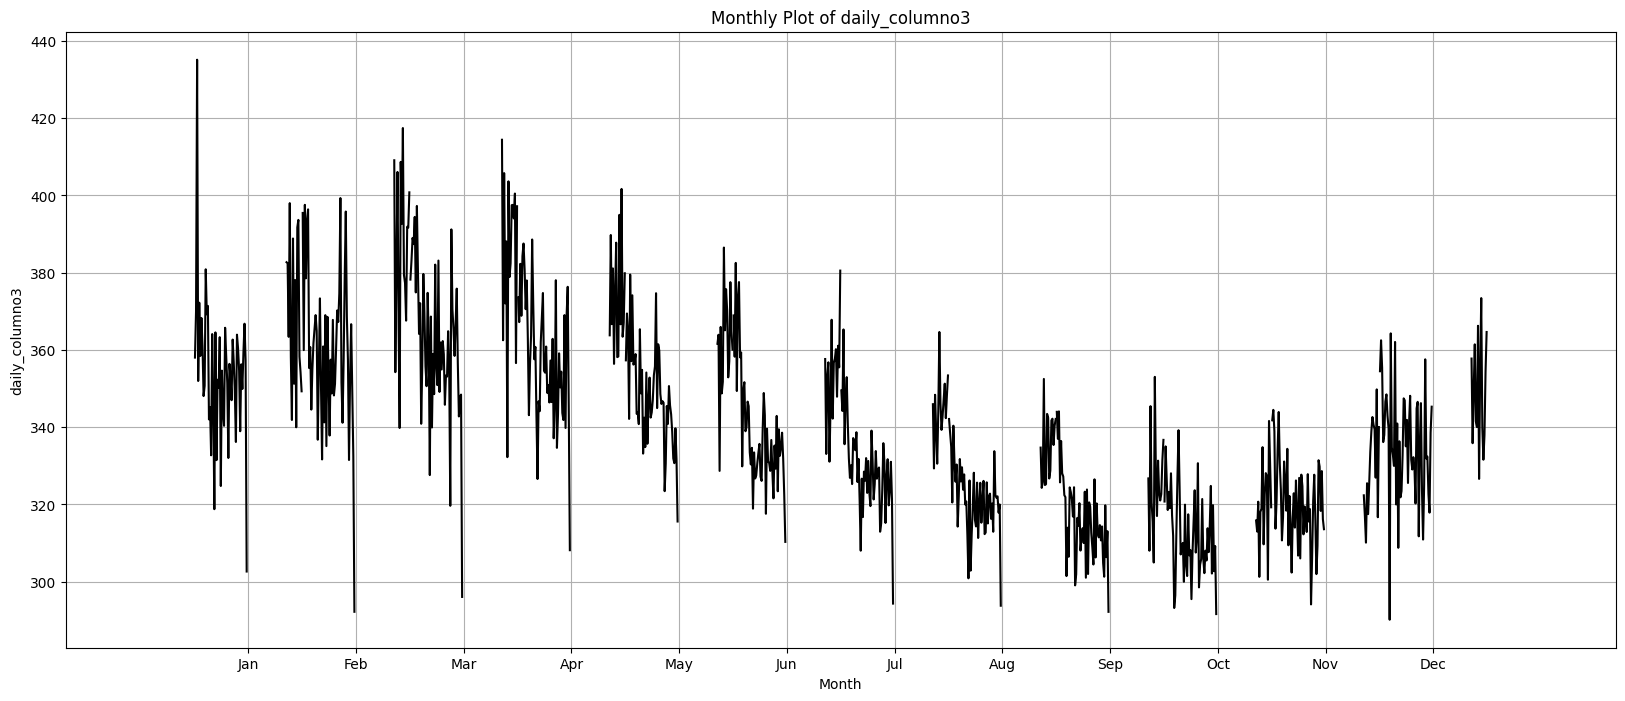

In [12]:
from statsmodels.graphics.tsaplots import month_plot

# Ensure 'daily_date' is in datetime format
df['daily_date'] = pd.to_datetime(df['daily_date'])

# Set 'daily_date' as the index
df = df.set_index('daily_date')

# Now resample and take the monthly mean
df_monthly_resampled = df['daily_columno3'].resample('M').mean()

# Plot using month_plot
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(20, 8))
month_plot(df_monthly_resampled, ylabel="Ozone", ax=ax)
plt.title("Monthly Plot of daily_columno3")
plt.xlabel("Month")
plt.ylabel('daily_columno3')
plt.grid()
plt.show()

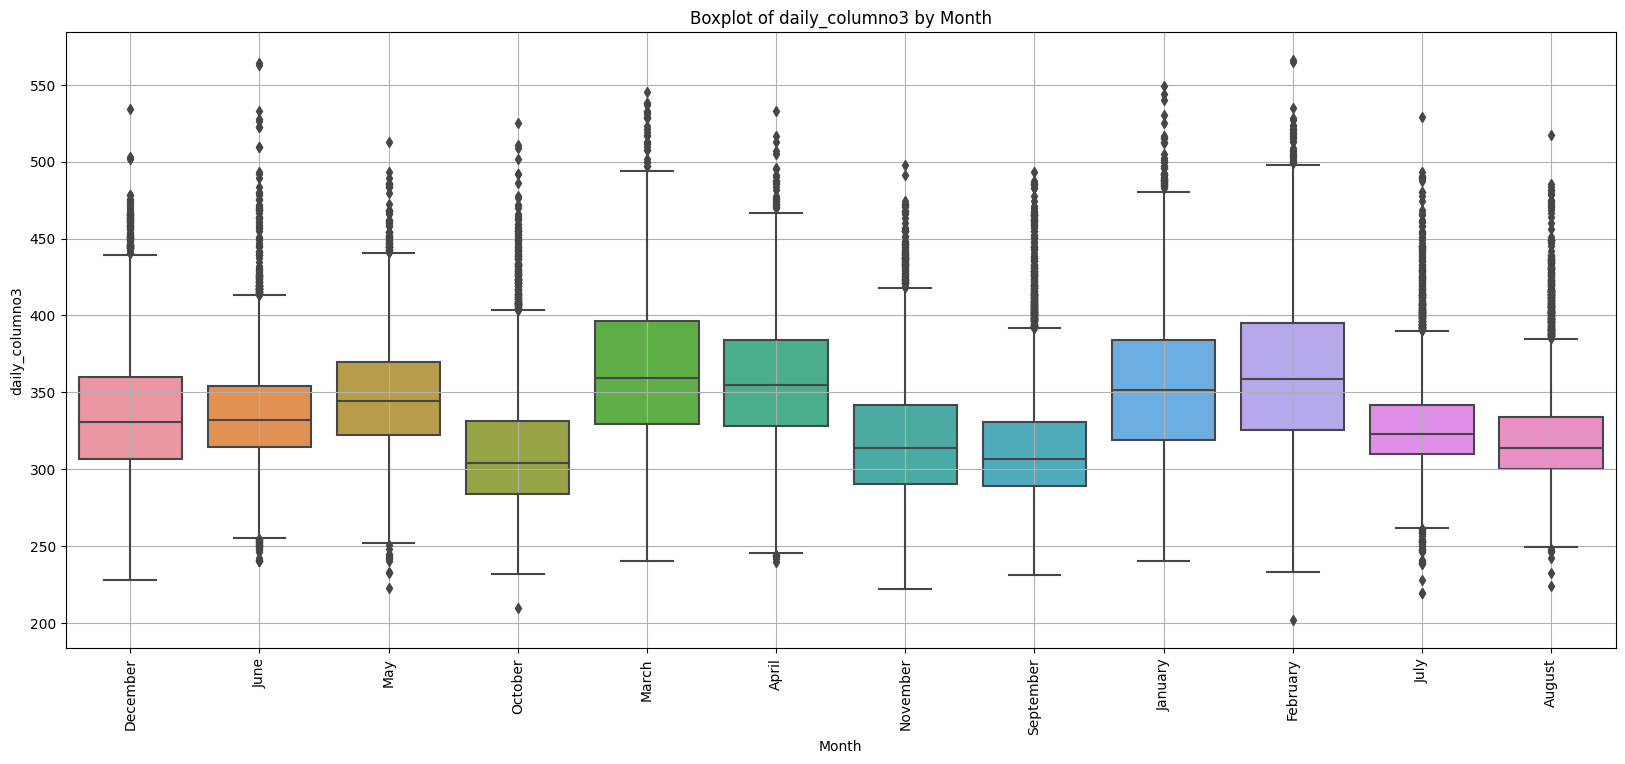

In [13]:
_ ,ax=plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.month_name(),y='daily_columno3',data=df,ax=ax)
plt.title("Boxplot of daily_columno3 by Month")
plt.xlabel("Month")
plt.ylabel('daily_columno3')
plt.xticks(rotation=90)
plt.grid()

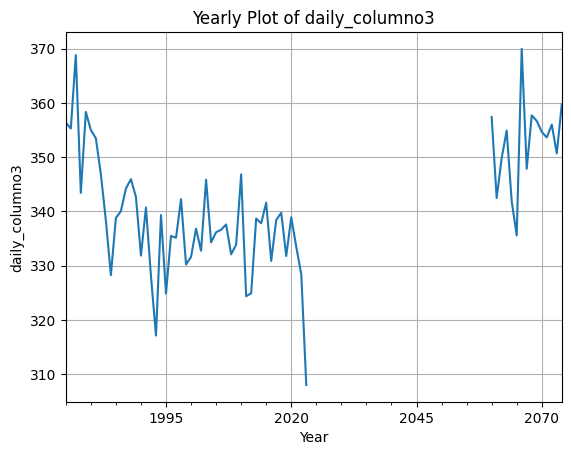

In [14]:
df_yearly_resampled = df['daily_columno3'].resample('A').mean()
df_yearly_resampled.plot()
plt.title("Yearly Plot of daily_columno3")
plt.xlabel("Year")
plt.ylabel('daily_columno3')
plt.grid()

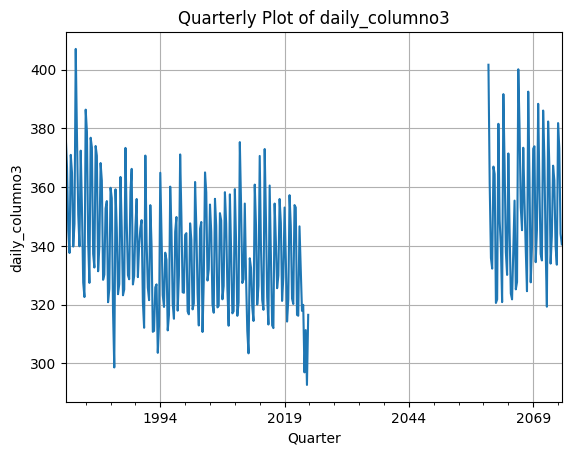

In [17]:
df_quarterly_resampled = df['daily_columno3'].resample('Q').mean()
df_quarterly_resampled.plot()
plt.title("Quarterly Plot of daily_columno3")
plt.xlabel("Quarter")
plt.ylabel('daily_columno3')
plt.grid()

<Figure size 1200x600 with 0 Axes>

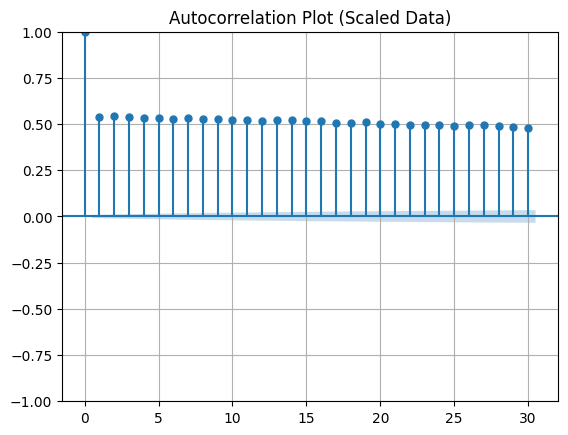

✅ Autocorrelation remains significant for all plotted lags.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# 1. Assume you already have your data
# Example:
# df = pd.read_csv('your_data.csv')

# 2. Scale the data
scaler = MinMaxScaler()
df['daily_columno3'] = scaler.fit_transform(df[['daily_columno3']])

# 3. Calculate ACF values on scaled data
acf_vals, confint = acf(df['daily_columno3'], nlags=30, alpha=0.05)

# 4. Calculate threshold from confidence interval
threshold = (confint[:,1] - confint[:,0]) / 2

# 5. Find first inconsistent lag
inconsistent_lag = None
for i, val in enumerate(acf_vals):
    if i == 0:  # Skip lag 0
        continue
    if abs(val) < threshold[i]:
        inconsistent_lag = i
        break

# 6. Plot ACF
plt.figure(figsize=(12,6))
plot_acf(df['daily_columno3'], lags=30, alpha=0.05)
plt.title('Autocorrelation Plot (Scaled Data)')
plt.grid()
plt.show()

# 7. Print result
if inconsistent_lag:
    print(f"👉 Autocorrelation becomes inconsistent after lag {inconsistent_lag}.")
else:
    print("✅ Autocorrelation remains significant for all plotted lags.")



In [38]:
df.head()

,daily_date,daily_columno3
0,23-12-23,0.464158
1,27-12-23,0.449602
2,30-12-23,0.521011
3,06-12-23,0.488327
4,17-12-23,0.368031


In [49]:
df['daily_date'] = pd.to_datetime(df['daily_date'], format='%d-%m-%y')

# 2. Sort the dataframe by the full date (oldest to latest)
df = df.sort_values('daily_date', ascending=True).reset_index(drop=True)

# Rolling average feature (7-day)
df['rolling_avg'] = df['daily_columno3'].rolling(window=3).mean().bfill()

df['lag1'] = df['daily_columno3'].shift(1)
df['lag2'] = df['daily_columno3'].shift(2)
df['lag3'] = df['daily_columno3'].shift(3)
df['lag4'] = df['daily_columno3'].shift(4)
df['lag5'] = df['daily_columno3'].shift(5)
df['lag6'] = df['daily_columno3'].shift(6)
df['lag7'] = df['daily_columno3'].shift(7)
df['lag8'] = df['daily_columno3'].shift(8)
df['lag9'] = df['daily_columno3'].shift(9)
df['lag10'] = df['daily_columno3'].shift(10)
df['lag11'] = df['daily_columno3'].shift(11)
df['lag12'] = df['daily_columno3'].shift(12)
df['lag13'] = df['daily_columno3'].shift(13)
df['lag14'] = df['daily_columno3'].shift(14)
df['lag15'] = df['daily_columno3'].shift(15)
df.dropna(inplace=True)
print(df.shape)
df.head()


(53946, 19)


,daily_date,daily_columno3,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,rolling_avg_7,rolling_avg
15,1969-06-20,0.365834,0.459489,0.603955,0.472672,0.488877,0.507553,0.333700,0.360341,0.438066,0.472672,0.355122,0.547652,0.603955,0.579786,0.595715,0.424609,0.478165,0.476426
16,1969-06-21,0.371052,0.365834,0.459489,0.603955,0.472672,0.488877,0.507553,0.333700,0.360341,0.438066,0.472672,0.355122,0.547652,0.603955,0.579786,0.595715,0.454600,0.398792
17,1969-06-23,0.456743,0.371052,0.365834,0.459489,0.603955,0.472672,0.488877,0.507553,0.333700,0.360341,0.438066,0.472672,0.355122,0.547652,0.603955,0.579786,0.451414,0.397876
18,1969-06-24,0.373798,0.456743,0.371052,0.365834,0.459489,0.603955,0.472672,0.488877,0.507553,0.333700,0.360341,0.438066,0.472672,0.355122,0.547652,0.603955,0.405383,0.400531
19,1969-06-25,0.365834,0.373798,0.456743,0.371052,0.365834,0.459489,0.603955,0.472672,0.488877,0.507553,0.333700,0.360341,0.438066,0.472672,0.355122,0.547652,0.386652,0.398792


Model Evaluation Metrics:

----- Linear Regression -----
RMSE: 0.000
MAE : 0.000
R2  : 100.00 %

----- Decision Tree -----
RMSE: 0.018
MAE : 0.010
R2  : 97.96 %

----- Random Forest -----
RMSE: 0.012
MAE : 0.005
R2  : 99.19 %

----- Gradient Boosting -----
RMSE: 0.025
MAE : 0.016
R2  : 96.25 %

----- Support Vector Regressor -----
RMSE: 0.031
MAE : 0.020
R2  : 94.15 %



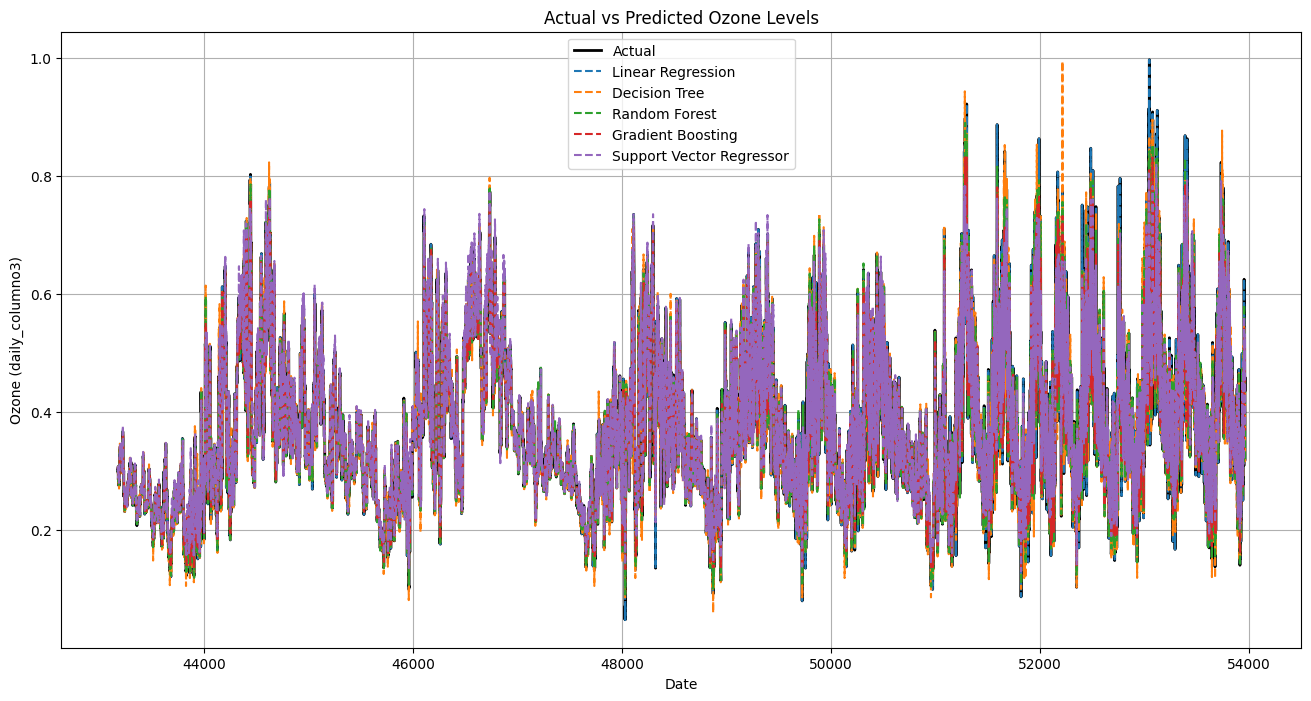

In [50]:

X = df[['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13', 'lag14', 'lag15', 'rolling_avg']]
y = df['daily_columno3']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# STEP 3: Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

# STEP 4: Train, Predict, and Evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results[name] = {
        'Model': model,
        'Predictions': preds,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# STEP 5: Print evaluation metrics
print("Model Evaluation Metrics:\n")
for name, res in results.items():
    print(f"----- {name} -----")
    print(f"RMSE: {res['RMSE']:.3f}")
    print(f"MAE : {res['MAE']:.3f}")
    print(f"R2  : {(res['R2']*100):.2f} %\n")

# STEP 6: Plot actual vs predicted
plt.figure(figsize=(16, 8))

# Actual data
plt.plot(y_test.index, y_test.values, label='Actual', color='black', linewidth=2)

# Predictions from each model
for name, res in results.items():
    plt.plot(y_test.index, res['Predictions'], label=name, linestyle='--')

plt.title('Actual vs Predicted Ozone Levels')
plt.xlabel('Date')
plt.ylabel('Ozone (daily_columno3)')
plt.legend()
plt.grid(True)
plt.show()
